# Описание проекта:

Приоритизируем гипотезы интернет-магазина, запускаем  A/B-тест и проанализируем полученные результаты. На основании их  помогаем отделу маркетинга увеличивать выручку.

# Цель:

 Помочь маркетологам увеличить выручку проверив подготовленный список гипотез.

# План проекта:

 1. Приоритизация гипотез.
 2. Анализ A/B-теста
 3. Выводы

# Оглавление
# 1.[Часть 1. Приоритизация гипотез.](#1) 
# 2.[Часть 2. Анализ A/B-теста](#2) 
# 3.[Общий вывод](#3)

# Часть 1. Приоритизация гипотез.<a id="1"></a>

In [1]:
# загрузим наши файлы и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import pandas as pd

data = pd.read_csv('/datasets/hypothesis.csv')

data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [2]:
# Переименуем названия столбцов:
data.columns = data.columns.str.lower()

In [3]:
#Применим фреймворк ICE для приоритизации гипотез:
data['ICE'] = ((data['impact'] * data['confidence'])/data['efforts']).round(2)
pd.set_option('display.max_colwidth', 0)
display(data.sort_values(by='ICE',ascending =False)[['hypothesis','ICE']])

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [4]:
#Применим фреймворк RICE для приоритизации гипотез:
data['RICE'] = (data['reach'] * data['impact'] *data['confidence']) / data['efforts']
pd.set_option('display.max_colwidth', 0)
display(data.sort_values(by='RICE', ascending =False)[['hypothesis','RICE']])

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


# Вывод:

* При применение фреймворка ICE: топ3 гипотезы 8,0,7  худшая 4
* При применение фреймворка RICE: топ 3 гипотезы 7,2,0 худшая 4
* Гипотеза 8 сместилась с первого места во фрейворке RICE по сравнению с ICE, по причине меньше охвата пользователей чем в гипотезе 7 и 2
* ТОП 5 гипотез по обоим фреймворкам получился одинаковый

# Часть 2. Анализ A/B-теста<a id="2"></a>

In [5]:
# загрузим наши файлы и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

visits = pd.read_csv('/datasets/visitors.csv')
orders = pd.read_csv('/datasets/orders.csv')

orders.info()
print()
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
# Посмотрим на 10 первых строчек таблицы заказы:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
# Приведем столбец с датами к специальному типу данных:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
# Проверим на наличие дубликатов:
orders.duplicated().sum()

0

In [9]:
# Посмотрим на 10 первых строчек таблицы визиты:
visits.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
# Приведем столбец с датами к специальному типу данных:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# Проверим на наличие дубликатов:
visits.duplicated().sum()

0

**Соберём агрегированные кумулятивные по дням:**

In [12]:
# создаем массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date','group']].drop_duplicates()

In [13]:
# получаем агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях: 
visitsAggregated = (datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

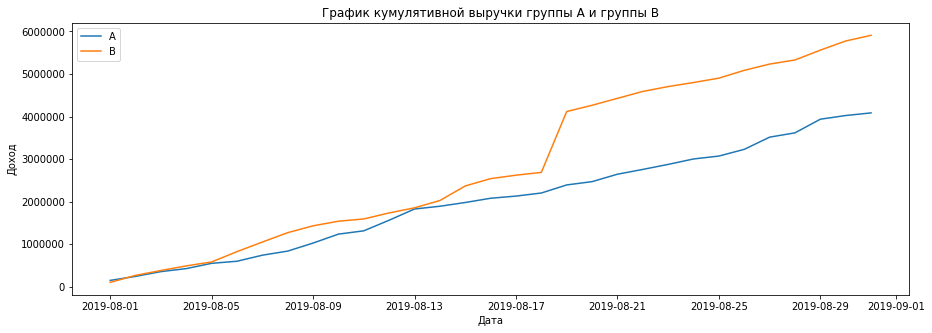

In [18]:
# Строим график выручки:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('График кумулятивной выручки группы А и группы В')
plt.xlabel('Дата')
plt.ylabel('Доход')
plt.show()

**вывод:** 
* выручка равномерно увеличивается на протяжении всего теста
* у группы В наблюдаем резкий всплеск, скорее всего это влияние дорогих заказов

**Постройм график кумулятивного среднего чека по дням и группам А/В-тестирования:**

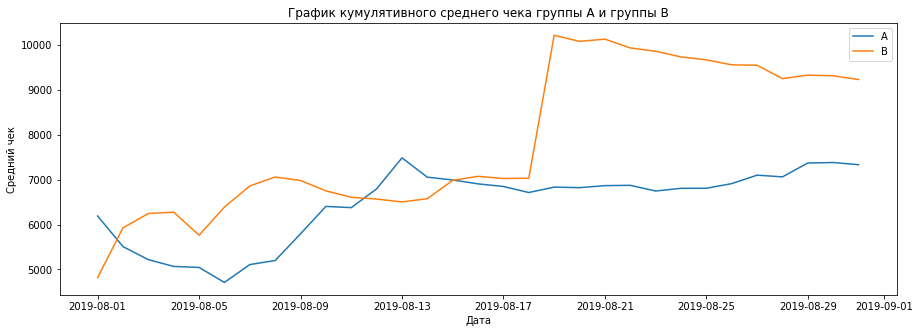

In [19]:
# Строим график среднего чека:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека группы А и группы В')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

**Вывод:**
* наблюдаем резкий рост среднего чека в группе В
* средний чек для группы А и В к концу теста практически стал равномерным

**Постройм график относительного изменения кумулятивного среднего чека группы B к группе A:**

In [20]:
# собираем данные в одном датафрейме:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

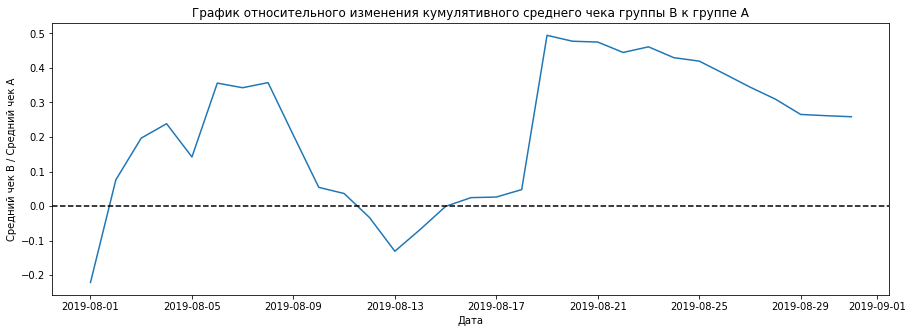

In [21]:
# cтроим отношение средних чеков:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек В / Средний чек А')
plt.show()


**Выводы:**
* некоторое время график находится в отрицательной области и имеются резкие скачки, все указывает на наличие выбросов
* график в конце теста практически равномерный

**Постройм график кумулятивной конверсии по дням и группам А/В-тестирования:**

In [22]:
# считаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [23]:
# отделяем данные по группе A:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [24]:
# отделяем данные по группе B:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

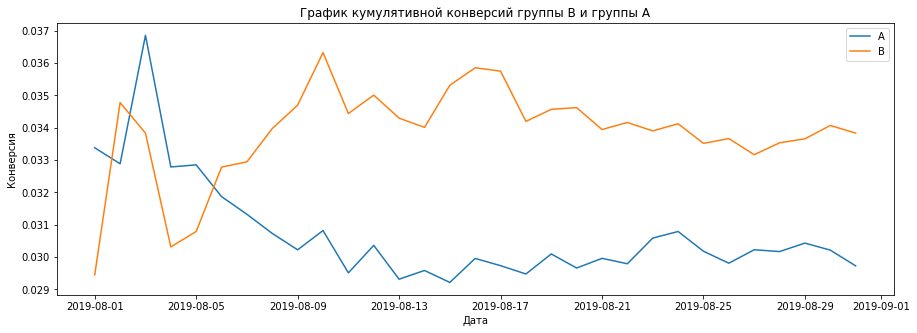

In [25]:
# строим графики:
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсий группы B и группы A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

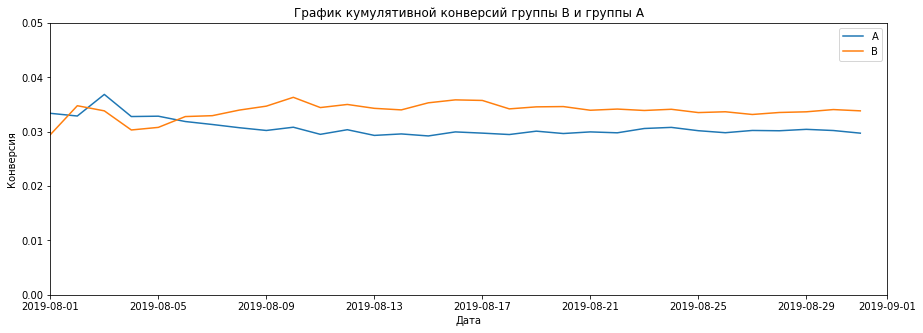

In [26]:
# строим графики (удалимся по масштабу):
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсий группы B и группы A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.show()

**Выводы:**
* в самом начале теста конверсия двигалась примерно одинаково
* конверсия группы В значительно выше конверсии группы А на протяжение более половины от вермени теста
* под конец теста конверсия обоих групп распределяется равномерно

**Постройм график относительного изменения кумулятивной конверсии группы B к группе A:**

In [27]:
# собираем данные в одном датафрейме:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

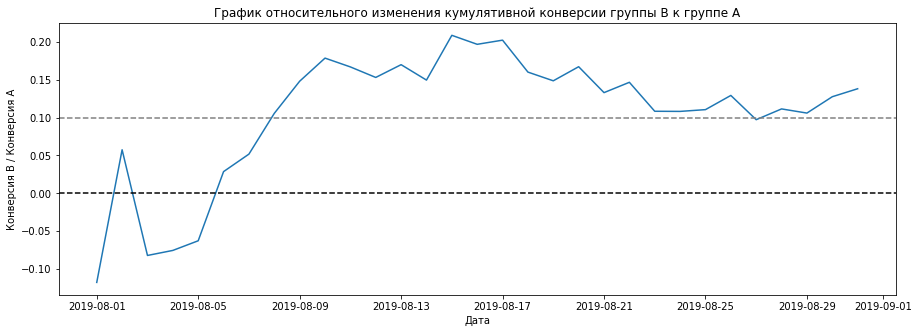

In [28]:
# Построим график:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия В / Конверсия А')
plt.show()

**Выводы:**
* в начале теста конверсия группы В имела не стабильный характер, рост сопровождался падением
* конверсия группы В больше конверсии группы А на 10% и растет


**Постройм точечный график количества заказов по пользователям:**

In [29]:
# Найдем число заказов по пользователям:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

In [30]:
# Выведем на экран в порядке убывания по кол-ву заказов:
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


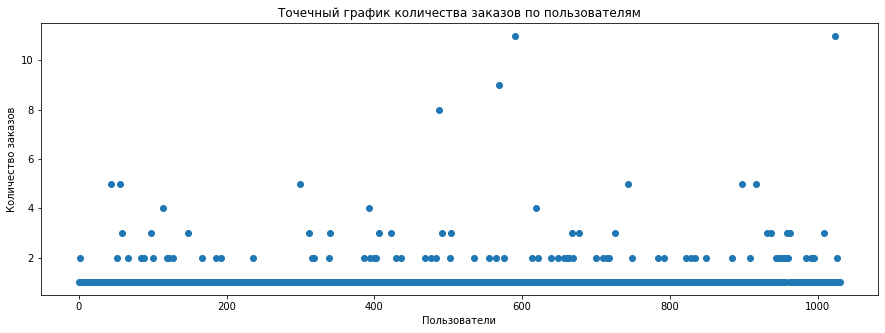

In [31]:
# Построим диаграмму методом scatter:
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:**
* достаточно много клиентов с заказами от 2 до 5 
* имеются одиночные клиенты, которые заказывают 8-11 раз

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:**

In [32]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя:
display(np.percentile(ordersByUsers['orders'], [95, 99])) 

array([2., 4.])

**Выводы:**
* Не более 5% пользователей оформляли больше чем 2 заказа
* Не более 1% пользователей оформляли больше чем 4 заказа
* Нижняя граница по заказам составляет 2 заказа, все что выше можно считать за аномалию

**Построим точечный график стоимостей заказов:**


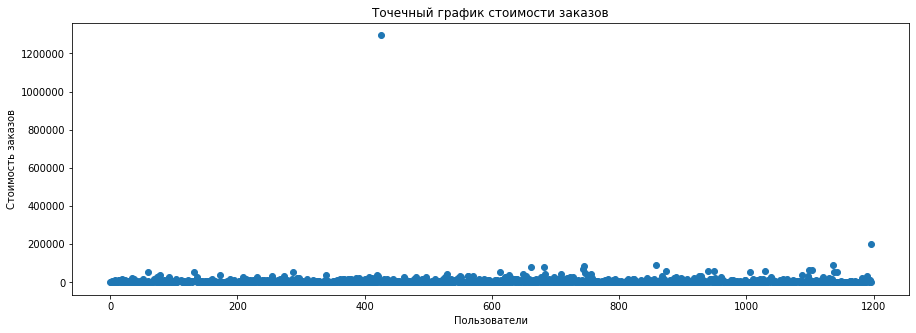

In [33]:
# Построим диаграмму методом scatter:
plt.figure(figsize=(15,5))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

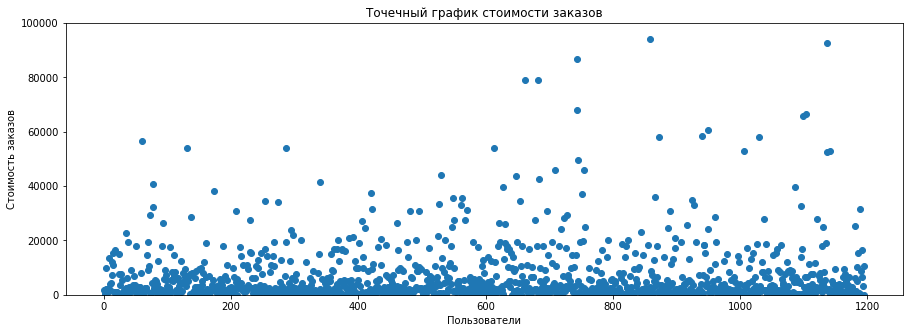

In [34]:
# Построим диаграмму методом scatter (приблизим):
plt.figure(figsize=(15,5))
plt.ylim(0, 100000)
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

**Вывод:**
* есть единичные дорогие заказы за 200 тысяч и за 1.2млн.
* основная масса заказов в  до 50 тысяч

**Посчитаем 95-й и 99-й перцентили стоимости заказов:**

In [35]:
# Посчитаем выборочные перцентили стоимости заказов:
display(np.percentile(orders['revenue'], [95, 99])) 

array([28000. , 58233.2])

**Выводы:**
* Не более 5% пользователей оформляли заказ на сумму более 28 тысяч
* Не более 1% пользователей оформляли заказ на сумму более 58233 
* Нижняя граница по стоимости заказов составляет 28 тысяч, все что выше можно считать за аномалию

**Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:**

In [36]:
# Данные с пользователями, которые заказывали хотя бы раз в группе А:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [37]:
# Данные с пользователями, которые заказывали хотя бы раз в группе B:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [38]:
# Данные пользователей, которые купили хотя бы 1 раз с пользователями, которые ничего не покупали(заполнено 0):
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Сформулируем гипотезы:
* H0:Конверсия между группами А и В по сырым данным НЕ отличаются
* H1:Конверсия между группами А и В по сырым данным отличаются

In [39]:
print('p-значение: ', stats.mannwhitneyu(sampleA, sampleB,alternative = 'two-sided')[1].round(5))

if stats.mannwhitneyu(sampleA, sampleB,alternative = 'two-sided')[1] < 0.05 :  
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.01679
Отвергаем нулевую гипотезу: разница статистически значима


In [40]:
print(" Разница между конверсиями двух групп составляет - {0:.1%}".format(sampleB.mean() / sampleA.mean() - 1)) 

 Разница между конверсиями двух групп составляет - 13.8%


**Вывод:**
P-value значительно меньше 0.05. Значит, причин принимать нулевую гипотезу и считать, что конверсия двух групп совпадает, нет. А так же, конверсия группы B значительно выше конверсии группы A на 13.8%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:**

Сформулируем гипотезы:
* H0:Средний чек группы А и В по сырым данным НЕ отличаются
* H1:Средний чек группы А и В по сырым данным отличаются

In [41]:
print('p-значение: ', stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative = 'two-sided')[1].round(3))

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative = 'two-sided')[1] < 0.05 :  
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [42]:
print('Разница среднего чека двух групп составляет - {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Разница среднего чека двух групп составляет - 25.9%


**Вывод:**
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A на 25.9%.

**Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:**

In [43]:
# Сделаем срезы пользователей с числом заказов больше 2:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']],axis=0)

In [44]:
# Сделаем срезы пользователей совершивших заказы дороже 28 тысяч:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [45]:
# Объединим аномалии в таблице:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [46]:
# Выведем количество аномалий:
display(abnormalUsers.shape) 

(74,)

In [47]:
# Подготовим очищенные данные группы А:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visits[visits['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders']) ),name='orders')],axis=0)


In [48]:
# Подготовим очищенные данные группы В:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(visits[visits['group']=='A']['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

Сформулируем гипотезы:
* H0:Конверсия между группами А и В по очищенным данным НЕ отличаются
* H1:Конверсия между группами А и В по очищенным данным отличаются

In [49]:
print('p-значение: ', stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative = 'two-sided')[1].round(5))

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative = 'two-sided')[1] < 0.05 :  
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.00839
Отвергаем нулевую гипотезу: разница статистически значима


In [50]:
print(" Разница между конверсиями двух групп составляет - {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

 Разница между конверсиями двух групп составляет - 18.4%


**Вывод:**
P-value  по очищенным данным значительно меньше 0.05. Значит, причин принимать нулевую гипотезу и считать, что конверсия двух групп совпадает, нет. А так же, конверсия группы B значительно выше конверсии группы A на 18.4%.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:**

Сформулируем гипотезы:
* H0:Средний чек группы А и В по очищенным данным НЕ отличаются
* H1:Средний чек группы А и В по очищенным данным отличаются

In [51]:
print('p-значение: ', stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],alternative = 'two-sided')[1].round(3))

if stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],alternative = 'two-sided')[1] < 0.05 :  
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.738
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [52]:
print('Разница среднего чека двух групп составляет - {0:.1%}'.format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()     /      orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1)) 

Разница среднего чека двух групп составляет - -2.0%


**Вывод:**
P-value очищенных данных значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B меньше среднего чека группы A на 2%.

# Общий вывод:<a id="3"></a>

1. Цель проекта: оценить и приоритизировать подготовленный список гипотез. 


2. Исходные данные: 
   * таблица с гипотезами (краткое описание гипотез,охват/влияние/уверенность/затраты по 10-балльной шкале);
   * таблица с заказами ( ID заказа и пользователя, дата, группа A/B-теста, выручка);
   * таблица с визитами ( дата, группа A/B-теста, кол-во пользователей).


3. Исходные данные были достаточно чистыми, дополнительной обработки артефактов не понадобилось. Поменяли только тип данные для даты для дальнейшей обработки.


4. Выбрали ТОП №5 гипотез с помощью фреймворков RICE ICE:
   * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
   *	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
   *	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
   *	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
   *	Запустить акцию, дающую скидку на товар в день рождения


5. Бизнес-метрики:
   * Не более 5% пользователей оформляли больше чем 2 заказа;
   * Не более 1% пользователей оформляли больше чем 4 заказа;
   * Нижняя граница по заказам составляет 2 заказа, все что выше можно считать за аномалию;
   * Не более 5% пользователей оформляли заказ на сумму более 28 тысяч;
   * Не более 1% пользователей оформляли заказ на сумму более 58233;
   * Нижняя граница по стоимости заказов составляет 28 тысяч, все что выше можно считать за аномалию.


6. Результаты проверки гипотез:
   * Конверсия группы B значительно выше конверсии группы A на 13.8%  по сырым данным;
   * Средний чек группы B значительно выше среднего чека группы A на 25.9% по сырым данным;
   * Конверсия группы B значительно выше конверсии группы A на 18.4% по очищенным данным;
   * Средний чек группы B меньше среднего чека группы A на 2% по очищенным данным;
   * Есть статистически значимые различия по конверсии между группами по «сырым» и по данным после фильтрации аномалий;
   * Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
   * График различия конверсии между группами сообщает, что результаты группы B лучеш группы A и растет;
   * График различия среднего чека говорит о том, что результаты группы B лучше группы А, но ухудшаются;

Исходя из обнаруженных фактов, тест следует продолжить, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A  говорить еще рано, необходимо убедиться, что есть статистическое значимое различие по среднему чеку.
